In [1]:
import math
import pyibex as ia 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import utils.utils as u 
import numpy as np

In [2]:
# Create figure and axes
def _draw_box(x_lo, x_up, y_lo, y_up, edgecolor='black', facecolor='blue', ax=None):
    if ax is None: ax = plt.gca()        
    xy = (x_lo,y_lo)    
    width  = x_up-x_lo
    height = y_up-y_lo
    # Create a Rectangle patch
    rect = patches.Rectangle(xy,width,height,linewidth=1,edgecolor=edgecolor,facecolor=facecolor)
    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.autoscale()
    return ax

def draw_box(b, edgecolor='black', facecolor='blue', ax=None):
    b_lo, b_up = b.lb(), b.ub()
    return _draw_box(b_lo[0], b_up[0], b_lo[1], b_up[1], edgecolor, facecolor, ax)



The equation of a rotated ellipse is:

$\frac{((x-x_c)cos(\theta) + (y-y_c)sin(\theta))^2}{R_x^2} + 
\frac{((x-x_c)sin(\theta) + (y-y_c)cos(\theta))^2}{R_y^2}  = 1$

where:
- $(x_c, y_c)$ is the centre of the Ellipse
- $R_x$ is the major axis (sometimes also called a)
- $R_y$ is the minor axis (sometimes also named b)
- $\theta$ is the angle of ellipse rotation


In [3]:
def ellipse_2d(f1, f2, p):
    
    if type(f1) != np.ndarray: 
        print('f1 = np.asarray(f1)')
        f1 = np.asarray(f1)
    if type(f1) != np.ndarray: 
        print('f2 = np.asarray(f2)')
        f2 = np.asarray(f2)
    if type(p) != np.ndarray: 
        print('p = np.asarray(p)')
        p = np.asarray(p)        
                  
    f1_x, f1_y = f1[0], f1[1]
    f2_x, f2_y = f2[0], f2[1]
    
    x_c = (f1_x+f2_x)/2
    y_c = (f1_y+f2_y)/2

    # pf1+pf2=2a
    a = (np.linalg.norm(p-f1) + np.linalg.norm(p-f2))/2
    
    # c is the distance from each focus to the center 
    c = np.linalg.norm(np.array([f1_x, f1_y]) - np.array([f2_x, f2_y]))/2
    
    # semi_minor_axis
    b = math.sqrt(a**2 - c**2);
    
    print(f'a:{a}, b:{b}')
        
    # rotation of the ellipse around z
    theta = math.atan2(f1_y - f2_y,  f1_x - f2_x)  
    
    
    t = np.linspace(0, 2*np.pi, 100)
    eq = np.array([a*np.cos(t), b*np.sin(t)])  
    R_rot = np.array([[np.cos(theta) , -np.sin(theta)],
                      [np.sin(theta) , np.cos(theta)]])  

    eq_rot = np.zeros((2, eq.shape[1]))
    for i in range(eq.shape[1]):
        eq_rot[:,i] = np.dot(R_rot, eq[:,i])

    return x_c + eq_rot[0,:] , y_c + eq_rot[1,:]

f1 = np.asarray(f1)
p = np.asarray(p)
a:1.1441228056353687, b:0.24293413587832288


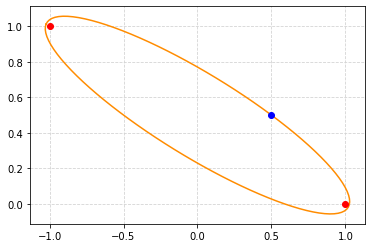

In [4]:
f1 = -1, 1
f2 = 1, 0
p = 0.5, 0.5

x, y = ellipse_2d(f1, f2, p)

plt.plot( x, y, 'darkorange' )    
plt.grid(color='lightgray',linestyle='--')
plt.plot(f1[0], f1[1], marker='.', markersize=12, color='red')
plt.plot(f2[0], f2[1], marker='.', markersize=12, color='red')
plt.plot(p[0], p[1], marker='.', markersize=12, color='blue')
plt.show()

In [5]:
def g_ellipse_2d(f1, f2, p, x):
    
    if type(f1) != np.ndarray: 
        print('f1 = np.asarray(f1)')
        f1 = np.asarray(f1)
    if type(f1) != np.ndarray: 
        print('f2 = np.asarray(f2)')
        f2 = np.asarray(f2)
    if type(p) != np.ndarray: 
        print('p = np.asarray(p)')
        p = np.asarray(p)        
                  
    f1_x, f1_y = f1[0], f1[1]
    f2_x, f2_y = f2[0], f2[1]
    
    x_c = (f1_x+f2_x)/2
    y_c = (f1_y+f2_y)/2

    # pf1+pf2=2a
    a = (np.linalg.norm(p-f1) + np.linalg.norm(p-f2))/2
    
    # c is the distance from each focus to the center 
    c = np.linalg.norm(np.array([f1_x, f1_y]) - np.array([f2_x, f2_y]))/2
    
    # semi_minor_axis
    b = math.sqrt(a**2 - c**2);
    
    print(f'a:{a}, b:{b}')
    
    # rotation of the ellipse around z
    theta = math.atan2(f1_y - f2_y,  f1_x - f2_x)      
    
    # Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0, with B^2-4AC < 0
    # Real ellipse if C*Delta<0
    # Delta = (AC-B^2/4)*F+BED/4-CD^2/4-AE^2/4
    A = a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2
    B = 2*(b**2-a**2)*np.sin(theta)*np.cos(theta)
    C = a**2*np.cos(theta)**2 + b**2*np.sin(theta)**2
    D = -2*A*x_c - B*y_c
    E = -B*x_c - 2*C*y_c
    F = A*x_c**2 + B*x_c*y_c + C*y_c**2 - a**2*b**2
    
    #Cy^2 + (Bx + E)y + (Ax^2 + Dx + F) = 0    
    eq_a = C
    eq_b = (B*x + E)
    eq_c = (A*x**2 + D*x + F) 
    
    y_1 = (-eq_b + np.sqrt(eq_b**2-4*eq_a*eq_c))/(2*eq_a)
    y_2 = (-eq_b - np.sqrt(eq_b**2-4*eq_a*eq_c))/(2*eq_a)
   
    return np.concatenate((x, x), axis=0), np.concatenate((y_2, y_1), axis=0)
    

f1 = np.asarray(f1)
p = np.asarray(p)
a:1.1441228056353687, b:0.24293413587832288


/Users/andreamunafo/opt/anaconda3/envs/csp/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in sqrt
/Users/andreamunafo/opt/anaconda3/envs/csp/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in sqrt


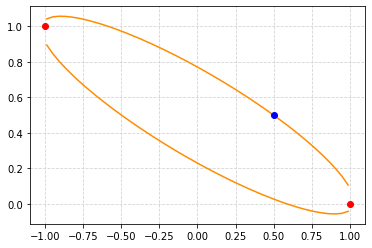

In [6]:
x, y = g_ellipse_2d(f1, f2, p, x=np.linspace(-2, 2, 100))

plt.plot( x, y, 'darkorange' )    
plt.grid(color='lightgray',linestyle='--')
plt.plot(f1[0], f1[1], marker='.', markersize=12, color='red')
plt.plot(f2[0], f2[1], marker='.', markersize=12, color='red')
plt.plot(p[0], p[1], marker='.', markersize=12, color='blue')
plt.show()

In [7]:
# A = a^2*sin(theta)^2 + b^2*cos(theta)^2
# B = 2*(b^2-a^2)*sin(theta)*cos(theta)
# C = a^2*cos(theta)^2 + b^2*sin(theta)^2
# D = -2*A*x_c - B*y_c
# E = -B*x_c - 2*C*y_c
# F = A*x_c^2 + B*x_c*y_c + C*y_c^2 - a^2*b^2

# (a^2*cos(theta)^2 + b^2*sin(theta)^2)*y^2 + 
# ((2*(b^2-a^2)*sin(theta)*cos(theta))*x + 
#  (-(2*(b^2-a^2)*sin(theta)*cos(theta))*x_c - 2*(a^2*cos(theta)**2 + b^2*sin(theta)^2)*y_c))*y + 
# ((a^2*sin(theta)^2 + b^2*cos(theta)^2)*x^2 + 
#  (-2*(a^2*sin(theta)^2 + b^2*cos(theta)^2)*x_c - (2*(b^2-a^2)*sin(theta)*cos(theta))*y_c)*x +
#  (a^2*sin(theta)^2 + b^2*cos(theta)^2)*x_c^2 + (2*(b^2-a^2)*sin(theta)*cos(theta))*x_c*y_c + (a^2*cos(theta)^2 + b^2*sin(theta)^2)*y_c^2 - a^2*b^2) = 0   

In [8]:
def ia_g_ellipse_eq(f1, f2, p):
    
    if type(f1) != np.ndarray: 
        print('f1 = np.asarray(f1)')
        f1 = np.asarray(f1)
    if type(f1) != np.ndarray: 
        print('f2 = np.asarray(f2)')
        f2 = np.asarray(f2)
    if type(p) != np.ndarray: 
        print('p = np.asarray(p)')
        p = np.asarray(p)        
                  
    f1_x, f1_y = f1[0], f1[1]
    f2_x, f2_y = f2[0], f2[1]
    
    x_c = (f1_x+f2_x)/2
    y_c = (f1_y+f2_y)/2

    # pf1+pf2=2a
    a = (np.linalg.norm(p-f1) + np.linalg.norm(p-f2))/2
    
    # c is the distance from each focus to the center 
    c = np.linalg.norm(np.array([f1_x, f1_y]) - np.array([f2_x, f2_y]))/2
    
    # semi_minor_axis
    b = math.sqrt(a**2 - c**2);
    
    print(f'a:{a}, b:{b}')
    
    # rotation of the ellipse around z
    theta = math.atan2(f1_y - f2_y,  f1_x - f2_x)      
    
    # Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0, with B^2-4AC < 0
    # Real ellipse if C*Delta<0
    # Delta = (AC-B^2/4)*F+BED/4-CD^2/4-AE^2/4
    #eq_string = '(a^2*cos(theta)^2 + b^2*sin(theta)^2)*y^2 + ((2*(b^2-a^2)*sin(theta)*cos(theta))*x + (-(2*(b^2-a^2)*sin(theta)*cos(theta))*x_c - 2*(a^2*cos(theta)^2 + b^2*sin(theta)^2)*y_c))*y + ((a^2*sin(theta)^2 + b^2*cos(theta)^2)*x^2 + (-2*(a^2*sin(theta)^2 + b^2*cos(theta)^2)*x_c - (2*(b^2-a^2)*sin(theta)*cos(theta))*y_c)*x + (a^2*sin(theta)^2 + b^2*cos(theta)^2)*x_c^2 + (2*(b^2-a^2)*sin(theta)*cos(theta))*x_c*y_c + (a^2*cos(theta)^2 + b^2*sin(theta)^2)*y_c^2 - a^2*b^2) = 0'
    
    A = f'({a}^2*cos({theta})^2 + {b}^2*sin({theta})^2)*y^2 +' 
    B = f'((2*({b}^2-{a}^2)*sin({theta})*cos({theta}))*x + (-(2*({b}^2-{a}^2)*sin({theta})*cos({theta}))*{x_c} - 2*({a}^2*cos({theta})^2 + {b}^2*sin({theta})^2)*{y_c}))*y + ' 
    C = f'(({a}^2*sin({theta})^2 + {b}^2*cos({theta})^2)*x^2 + (-2*({a}^2*sin({theta})^2 + {b}^2*cos({theta})^2)*{x_c} - (2*({b}^2-{a}^2)*sin({theta})*cos({theta}))*{y_c})*x + '
    DEF = f'({a}^2*sin({theta})^2 + {b}^2*cos({theta})^2)*{x_c}^2 + (2*({b}^2-{a}^2)*sin({theta})*cos({theta}))*{x_c}*{y_c} + ({a}^2*cos({theta})^2 + {b}^2*sin({theta})^2)*{y_c}^2 - {a}^2*{b}^2)' # = 0   
    
    return ia.Function("x", "y", A + B + C + DEF)

f1 = np.asarray(f1)
p = np.asarray(p)
a:1.1441228056353687, b:0.24293413587832288
number of separation 14673 / number of boxes 17736


<IPython.core.display.Javascript object>


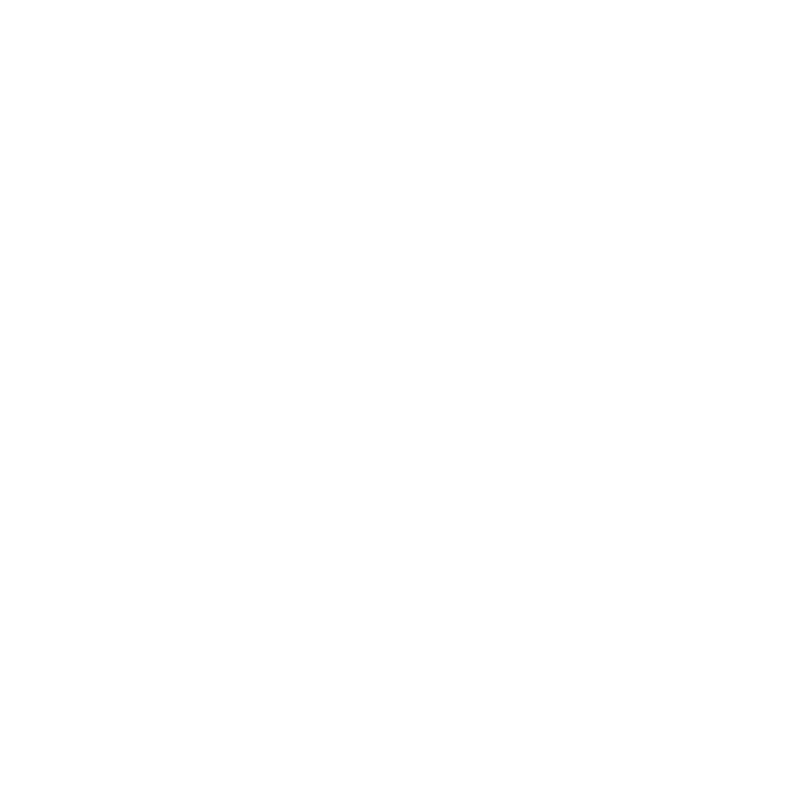

In [9]:
f = ia_g_ellipse_eq(f1, f2, p)

separator = ia.SepFwdBwd(f, ia.Interval(0.0, 0.0))

X = ia.IntervalVector([[-2, 2], [-2, 2]]) 
in_boxes, out_boxes, maybe_boxes = ia.pySIVIA(X, separator, epsilon=.01, draw_boxes=False) 

%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(4,4))

for b in out_boxes:
    draw_box(b, edgecolor='black', facecolor='blue', ax=ax)
    
for b in in_boxes:
    draw_box(b, edgecolor='black', facecolor='red', ax=ax)
    
for b in maybe_boxes:
    draw_box(b, edgecolor='yellow', facecolor='yellow', ax=ax)
    
# ax.set_xlim(-2, 6)
# ax.set_ylim(-2, 2)




f1 = np.asarray(f1)
p = np.asarray(p)
a:1.1441228056353687, b:0.24293413587832288
number of separation 14673 / number of boxes 17736


<IPython.core.display.Javascript object>


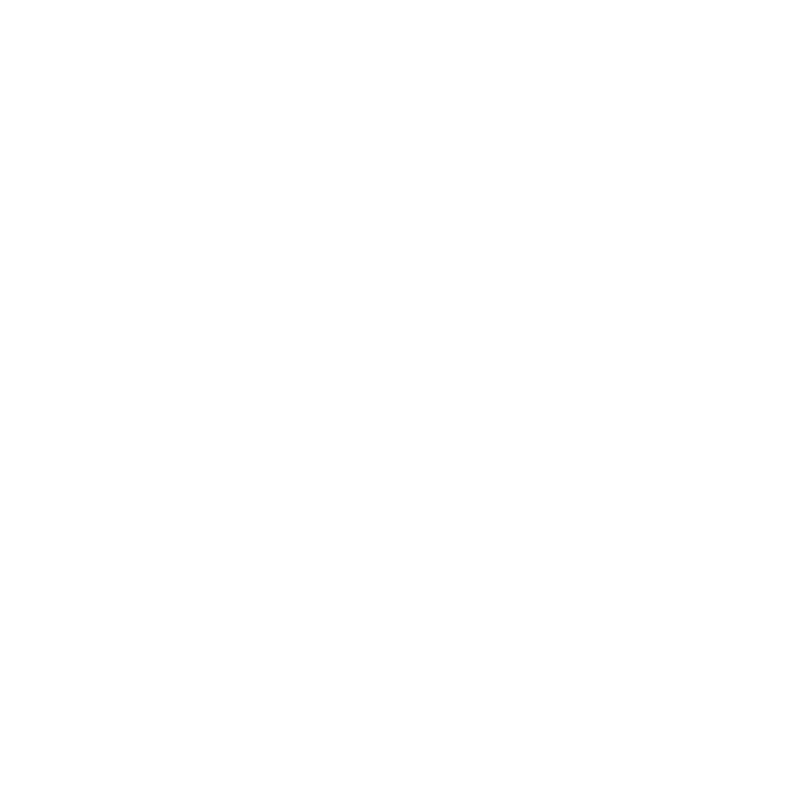

f1 = np.asarray(f1)
p = np.asarray(p)
a:1.1441228056353687, b:0.24293413587832288


In [10]:
f = ia_g_ellipse_eq(f1, f2, p)

separator = ia.SepFwdBwd(f, ia.Interval(0.0, 0.0))

X = ia.IntervalVector([[-2, 2], [-2, 2]]) 
in_boxes, out_boxes, maybe_boxes = ia.pySIVIA(X, separator, epsilon=.01, draw_boxes=False) 

%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(4,4))

for b in out_boxes:
    draw_box(b, edgecolor='black', facecolor='blue', ax=ax)
    
for b in in_boxes:
    draw_box(b, edgecolor='black', facecolor='red', ax=ax)
    
for b in maybe_boxes:
    draw_box(b, edgecolor='yellow', facecolor='yellow', ax=ax)
    

x, y = ellipse_2d(f1, f2, p)

plt.plot( x, y, 'darkorange' )    
plt.grid(color='lightgray',linestyle='--')
plt.plot(f1[0], f1[1], marker='.', markersize=12, color='red')
plt.plot(f2[0], f2[1], marker='.', markersize=12, color='red')
plt.plot(p[0], p[1], marker='.', markersize=12, color='blue')
plt.show()

f1 = np.asarray(f1)
p = np.asarray(p)
a:1.1441228056353687, b:0.5558929702514214
number of separation 267 / number of boxes 448


<IPython.core.display.Javascript object>


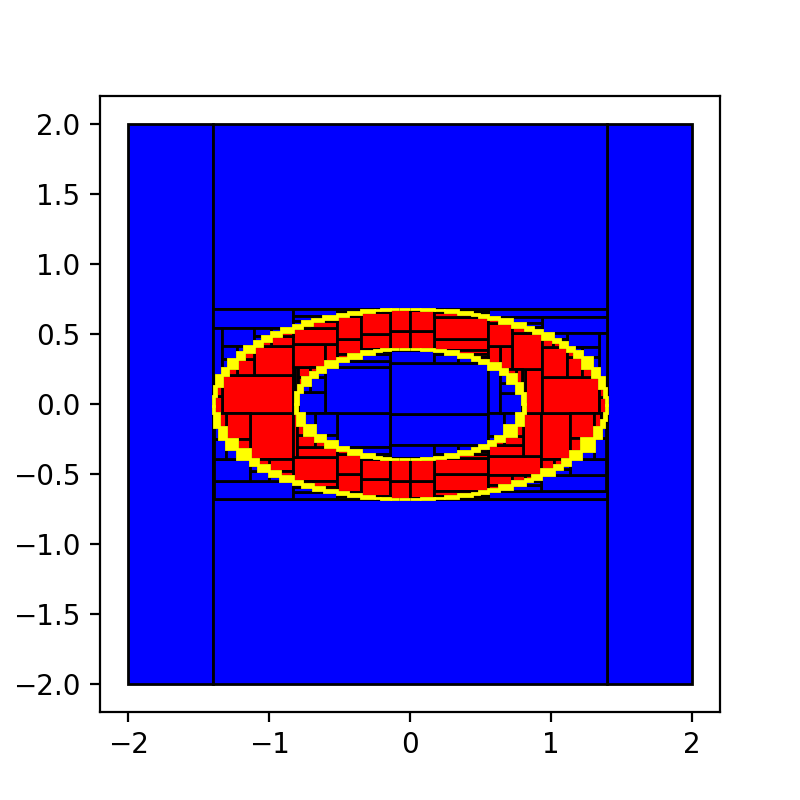

In [11]:
f1 = -1, 0
f2 = 1, 0
p = 0.5, 0.5


f = ia_g_ellipse_eq(f1, f2, p)

separator = ia.SepFwdBwd(f, ia.Interval(-.2, 0.2))

X = ia.IntervalVector([[-2, 2], [-2, 2]]) 
in_boxes, out_boxes, maybe_boxes = ia.pySIVIA(X, separator, epsilon=.1, draw_boxes=False) 

%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(4,4))

for b in out_boxes:
    draw_box(b, edgecolor='black', facecolor='blue', ax=ax)
    
for b in in_boxes:
    draw_box(b, edgecolor='black', facecolor='red', ax=ax)
    
for b in maybe_boxes:
    draw_box(b, edgecolor='yellow', facecolor='yellow', ax=ax)
   

# References

[ellipse](https://en.wikipedia.org/wiki/Ellipse)